
# 2.2.1.1 - 2D Rotation Matrix

This section will demonstrate how to rotate a matrix in 2D. We will start with two frames ({A} and {B}) with a common origin but with different orientation. Frame {B} is obtained by rotating frame {A} by $\theta$ in the positive (counter-clockwise) direction about the origin. These frames can be expressed in terms of the basis vectors of frame {A} as the following:

\begin{align*}
    \vec{x}_B = \vec{x}_Acos\theta + \vec{y}_Asin \theta\\
    \vec{y}_B = -\vec{x}_Asin\theta + \vec{y}_Acos\theta
\end{align*}

or in matrix form as:

\begin{align*}
    \begin{bmatrix} \vec{x}_B & \vec{y}_B \end{bmatrix} = \begin{bmatrix} \vec{x}_A & \vec{y}_A \end{bmatrix} \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{bmatrix}
\end{align*}

There is a special type of matrix called a *rotation matrix* that transforms frame {A}, described by $ \begin{bmatrix} \vec{x}_A & \vec{y}_A \end{bmatrix} $, into frame {B}, described by $ \begin{bmatrix} \vec{x}_B & \vec{y}_B \end{bmatrix} $:

\begin{align*}
    ^A\vec{R}_B(\theta) = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{bmatrix}
\end{align*}

Rotation matricies have special properties:
* They are vectors that define the axes of the rotated 2D coordinate frame
* Have unit length and orthogonal/orthonormal
* Its inverse is the same as its transpose: $ \vec{R}^{-1} = \vec{R}^T $
* The matrix-vector product preserves the length and relative orientation of vectors. Therefore, the determinant is +1
* It is a member of the Special Orthogonal (SO) group of 2D, which we write as $ \vec{R} \in \vec{SO}(2) \subset \Re^{2x2} $

We can write a coordinate vector as a linear combination of the basis vectors of the reference frame, which in matrix form, can be written as follows:

\begin{align*}
    ^A\vec{p} = \begin{bmatrix} \vec{x}_A & \vec{y}_A \end{bmatrix} \begin{bmatrix} ^Ap_x \\ ^Ap_y \end{bmatrix} \\
    ^B\vec{p} = \begin{bmatrix} \vec{x}_B & \vec{y}_B \end{bmatrix} \begin{bmatrix} ^Bp_x \\ ^Bp_y \end{bmatrix} \\
    \begin{bmatrix} \vec{x}_A & \vec{y}_A \end{bmatrix} \begin{bmatrix} ^Ap_x \\ ^Ap_y \end{bmatrix} = \space^A\vec{p} = \begin{bmatrix} \vec{x}_A & \vec{y}_A \end{bmatrix} \space^A\vec{R}_B(\theta) \begin{bmatrix} ^Bp_x \\ ^Bp_y \end{bmatrix} \\
    \begin{bmatrix} ^Ap_x \\ ^Ap_y \end{bmatrix} =  \space^A\vec{R}_B(\theta) \begin{bmatrix} ^Bp_x \\ ^Bp_y \end{bmatrix}  
\end{align*}

$ \xi $ as an $ \vec{SO}(2) $ matrix: For the case of pure rotation in 2D, $ $ can be implemented by a rotation matrix $ \vec{R} \in \vec{SO}(2) $. Its implementation is as follows:

|Term|Expression|Explanation|
|---|---|---|
| Compostion | $ \vec{\xi}_1 \oplus \vec{\xi}_2 \rightarrow \vec{R}_1\vec{R}_2 $ | Matrix Multiplication |
| Inverse | $ \ominus \vec{\xi} \rightarrow \vec{R}^{-1} = \vec{R}^T $ | Matrix Transpose |
| Identity | $ \varnothing \rightarrow \vec{R}(0) = \vec{1}_{2x2} $ | Identity Matrix |
| Vector-Transform | $ \vec{\xi} \cdot \vec{v} \rightarrow \vec{Rv} $ | Matrix-Vector Product |

Computation is commutative, that is: $ \vec{R}_1\vec{R}_2 = \vec{R}_2\vec{R}_1 $ and $ \vec{R}(-\theta) = \vec{R}^T(\theta) $.

Below shows how this is done using the rvctool; however, first we must have import the rvctool into our notebook:

In [48]:
# This imports our RVC Textbook with it's tools
import RVC3 as rvc
import sys, os.path
sys.path.append(os.path.join(rvc.__path__[0], 'examples'))

import numpy as np
from scipy import linalg, stats
import matplotlib.pyplot as plt
import math
from math import pi
np.set_printoptions(
    linewidth=120, formatter={
        'float': lambda x: f"{0:8.4g}" if abs(x) < 1e-10 else f"{x:8.4g}"})
np.random.seed(0)
from machinevisiontoolbox.base import *
from machinevisiontoolbox import *
from spatialmath.base import *
from spatialmath import *

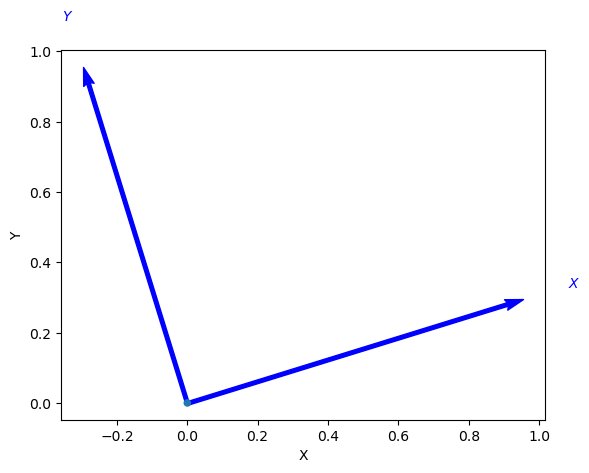

In [49]:
# This creates an SO(2) rotation (angle in radians) and plots it
R = rot2(.3)
trplot2(R);

In [50]:
# Below demonstrates some of the above properties:
np.linalg.det(R)    # Determinant is equal to one

np.linalg.det(R @ R)    # Product of two rotation matricies is also a rotation matrix
                        # The @ operator indicates matrix multiplication of NumPy arrays

0.9999999999999998

In [51]:
# The toolbox can support symbolic mathematics
# For this, SymPy needs to be installed
from sympy import Symbol, Matrix, simplify
theta = Symbol('theta')

In [52]:
R = Matrix(rot2(theta))     # Converts to SymPy matrix:
                            # Matrix = [ cos(theta)  -sin(theta)]
                            #          [ sin(theta)  cos(theta)]

simplify(R * R)
                            # Matrix = [ cos(2 * theta)  -sin(2 * theta)]
                            #          [ sin(2 * theta)  cos(2 * theta)]

R.det()     # sin(theta)**2 + cos(theta)**2

R.det().simplify()

1

# 2.2.2.1 - 2D Homogenous Transformation Matrix

This section will describe the relative pose of the frames as shown in the firgure below. We will need to account for the translation between the origins of the frams as well as the rotation.

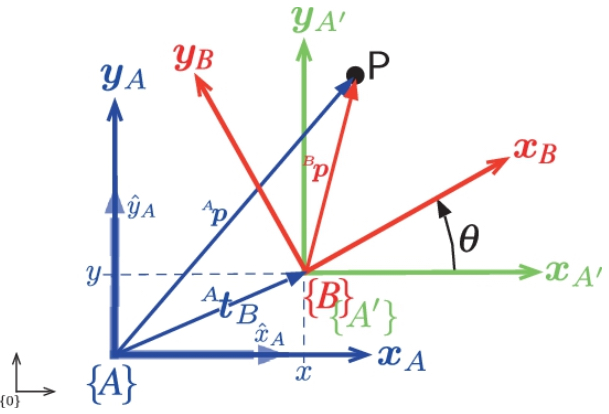

The first step is to transform the coordinate vector $ \space^B\vec{p} = (\space^Bx, \space^By) $, with respect to frame {B}, to $ \space^{A'}\vec{p} = (\space^{A'}x, \space^{A'}y) $ with respect to frame {A'} using the rotation matrix $ \space^{A'}\vec{R}_B(\theta) $ which is a function of the orientation $ \theta $. Since frames {A'} and {A} are parallel, the coordinate vector $ \space^A\vec{p} \space $ is obtained by adding $ \space^A\vec{t}_B = (t_x, t_y)^T $ to $ \space^{A'}\vec{p} \space $ like so:

\begin{align*}
    \begin{bmatrix} \space^Ax \\ \space^Ay \end{bmatrix} = \begin{bmatrix} \space^{A'}x \\ \space^{A'} \end{bmatrix} + \begin{bmatrix} t_x \\ t_y \end{bmatrix} \\
    = \begin{bmatrix} cos(\theta) & -sin(\theta) \\ sin(\theta) & cos(\theta) \end{bmatrix} \begin{bmatrix} \space^Bx \\ \space^By \end{bmatrix} + \begin{bmatrix} t_x \\ t_y \end{bmatrix} \\
    = \begin{bmatrix} cos(\theta) & -sin(\theta) & t_x \\ sin(\theta) & cos(\theta) & t_y \end{bmatrix} \begin{bmatrix} \space^Bx \\ \space^By \\ 1 \end{bmatrix} \\
    \begin{bmatrix} \space^Ax \\ \space^Ay \\ 1 \end{bmatrix} = \begin{bmatrix} \space^A\vec{R}_B & \space^A\vec{t}_B \\ \vec{0}_{1x2} & 1 \end{bmatrix} \begin{bmatrix} \space^Bx \\ \space^By \\ 1 \end{bmatrix}
\end{align*}


Where $ \space^A\vec{t}_B $ is the translation of the origin of frame {B} with respect to frame {A} and $ \space^A\vec{R}_B $ is the orientation of frame {B} with respect to frame {A}.

If we consider the homogeneous transformation as a relative pose or rigid-body motion, this corresponds to thte coordinate frame being first translated by $ \space^A\vec{t}_B $ with respect to frame {A}, and then rotated by $ \space^A\vec{R}_B(\theta) $.

The coordinate vectors for point $ p $ are expressed in homogeneous form and denote it as follows:

\begin{align*}
    \space^A\tilde{p} = \begin{bmatrix} \space^A\vec{R}_B(\theta) & \space^A\vec{t}_B \\ \vec{0}_{1x2} & 1 \end{bmatrix} \space^B\tilde{p} \\
    = \space^A\vec{T}_B \space^B\tilde{p}
\end{align*}

$ \space^A\vec{T}_B $ is referred to as a homogeneous transformation. The matrix has a very specific structure and belongs to the Special Euclidean (SE) group in 2D where $ \vec{T} \in \vec{SE}(2) \subset \Re^{3x3} $

$ \xi $ as an $ \vec{SE}(2) $ matrix: For the case of rotation and translation in 2D, $ \xi $ can be implemented by a homogeneous tranformation matrix $ \vec{T} \in \vec{SE}(2) \subset \Re^{3x3} $ which is sometiems written as an ordered pair $ (\vec{R}, \vec{t}) \in \vec{SO}(2) x \Re^2 $. This can be implemented as:

|Term|Expression|Explanation|
|---|---|---|
| Compostion | $ \vec{\xi}_1 \oplus \vec{\xi}_2 \rightarrow \vec{T}_1\vec{T}_2 = \begin{bmatrix} \vec{R}_1\vec{R}_2 & \vec{t}_1 + \vec{R}_1\vec{t}_2 \\ \vec{0}_{1x2} & 1 \end{bmatrix}  $ | Matrix Multiplication |
| Inverse | $ \ominus \vec{\xi} \rightarrow \vec{T}^{-1} = \begin{bmatrix} \vec{R}^T & -\vec{R}^T\vec{t} \\ \vec{0}_{1x2} & 1 \end{bmatrix} $ | Matrix Transpose |
| Identity | $ \varnothing \rightarrow \vec{1}_{3x3} $ | Identity Matrix |
| Vector-Transform | $ \vec{\xi} \cdot \vec{v} \rightarrow \epsilon(\vec{T}\tilde{v}) $ | Matrix-Vector Product |

where $ \tilde{\cdot} : \Re^2 \rightarrow \wp^2 $ and $ \epsilon(\cdot) : \wp^2 \rightarrow \Re^2 $. Composition is not commutative, that is, $ \vec{T}_1\vec{T}_2 \neq \vec{T}_2\vec{T}_1 $.

Below shows how this is done using the rvctool:

In [53]:
# First we create a rotation matrix for a .3 rad rotation
rot2(.3)

array([[  0.9553,  -0.2955],
       [  0.2955,   0.9553]])

In [54]:
# The homogeneous transformation matrix for this would be:
trot2(.3)

array([[  0.9553,  -0.2955,        0],
       [  0.2955,   0.9553,        0],
       [       0,        0,        1]])

In [55]:
# This composes two relative poses: a translation of (1, 2) followed by a rotation of 30 deg
TA = transl2(1, 2) @ trot2(30, "deg")

For describing rotations, the Toolbox has functions to create a rotation matrix (rot2) or a homogeneous transformation with zero translation (trot2)

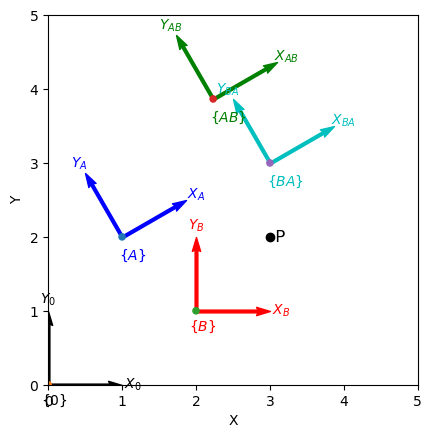

In [56]:
# This creates a plot representing the pose, relative to the reference frame
plotvol2([0, 5]);    # new plot with both axes from 0 to 5

# This section creates a 2D relative pose with a finite translation but zero rotation,
trplot2(TA, frame="A", color="b");    # reference frame

# This creates anothe relative pose whcih is at the origin with zero rotation
T0 = transl2(0, 0);
trplot2(T0, frame="0", color="k");    # reference frame

# This creates anothe relative pose which is a displacement of (2, 1) and zero rotation
TB = transl2(2, 1)
trplot2(TB, frame="B", color="r");

TAB = TA @ TB;
trplot2(TAB, frame="AB", color="g");

TBA = TB @ TA;
trplot2(TBA, frame="BA", color="c");


p = np.array([3, 2]);
plot_point(p, "ko", text="P");

To determine the coordinate of the point with respect to {A} we write $ \space^0\vec{p} = \space^0\vec{\xi}_A \cdot \space^A\vec{p} \space $ and then rearrage as $ \space^A\vec{p} = (\ominus\space^0\vec{\xi}_A) \cdot \space^0\vec{p} $. We obtain the following from rearranging the values:

In [57]:
np.linalg.inv(TA) @ np.hstack([p, 1])    # This converted the Eucliean point coordinates to homogeneous form

array([   1.732,       -1,        1])

In [58]:
h2e(np.linalg.inv(TA) @ e2h(p))     # The above statement is done using the toolbox
                                    # The result is in Euclidean coordinates
                                    # e2h (Euclidean), h2e (homogeneous)

array([[   1.732],
       [      -1]])

In [59]:
homtrans(np.linalg.inv(TA), p)    # Handles conversion of the coordinate vectors to and from homogeneous form

array([[   1.732],
       [      -1]])

# 2.2.2.2 - Rotating a Coordinate Frame

The pose of a coordinate frame is fully described by an $ \vec{SE}(2) $ matrix and here we will explorerotation of coordinate frames. First, we create and plot a reference coordinate frame {0} and a target frame {X}:

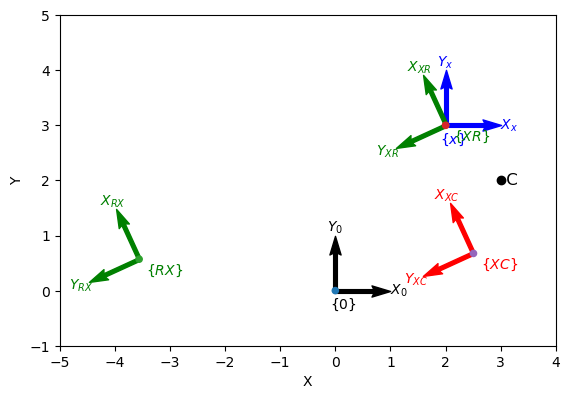

In [60]:
plotvol2([-5, 4, -1, 5]);
T0 = transl2(0, 0);
trplot2(T0, frame="0", color="k");
TX = transl2(2, 3);
trplot2(TX, frame="x", color="b");

# Create an SE(2) matrix representing a rotation of 2 radians (nearly 120 deg)
TR = trot2(2);
trplot2(TR @ TX, frame="RX", color="g");
trplot2(TX @ TR, frame="XR", color="g");

C = np.array([3, 2]);
plot_point(C, "ko", text="C");

TC = transl2(C) @ TR @ transl2(-C)
trplot2(TC @ TX, frame="XC", color="r");

To understand how this workds, we can unpack what happens when we apply TC to TX. Since $ \vec{T}_C $ premultiplies $ \vec{T}_X $, the first transform that is applied to {X} is the right-most one, `transl2(-C)`, which performs an origin shift that places C at the origin of the reference frame. Then, we apply $ \vec{T}_B $, a pure rotation which rotates the shifted version of {X} about the origin, which is where C now is - therefore {X} is rotated about C. Finally, we apply `transl2(C)` which is the inverse origin shift, that places C back at its original position and {X} to its final pose. This transformation is an example of a conjugation but its contruction was somewhat elaborate. A more intuitive way to achieve this same result is by using twists, which is introduced in Section 2.2.2.4.

# 2.3.1.1 - 3D Rotation Matrix

Just as for the 2D case, we can represent teh orientation of a coordinate frame by its basis vectors expressed in terms of the reference coordinate frame. Each basis vector has three elements and they form the columns of a 3 x 3 *orthogonal matrix* $ \space^A\vec{R}_B $, which transforms a coordinate vector defined with respect to frame {B} to a coordinate vector with respect to frame {A}:

\begin{align*}
    \begin{bmatrix} \space^Ap_x \\ \space^Ap_y \\ \space^Ap_z \end{bmatrix} = \space^A\vec{R}_B \begin{bmatrix} \space^Bp_x \\ \space^Bp_y \\ \space^Bp_z \end{bmatrix} \\
\end{align*}

A 3D rotation matrix $ \vec{R} $ has the same special properties as its 2D counterpart:
* They are vectors that define the axes of the rotated 3D coordinate frame
* Have unit length and orthogonal/orthonormal
* Its inverse is the same as its transpose: $ \vec{R}^{-1} = \vec{R}^T $
* The matrix-vector product preserves the length and relative orientation of vectors. Therefore, the determinant is +1
* It is a member of the Special Orthogonal (SO) group of 2D, which we write as $ \vec{R} \in \vec{SO}(3) \subset \Re^{3x3} $

The rotation matricies that correspond to a coordinate frame rotation of $ \theta $ about the x-, y-, and z-axes are

\begin{align*}
    \vec{R}_x = \begin{bmatrix} 1 & 0 & 0 \\ 0 & cos\theta & -sin\theta \\ 0 & sin\theta & cos\theta \end{bmatrix} \\
    \vec{R}_y = \begin{bmatrix} cos\theta & 0 & sin\theta \\ 0 & 1 & 0 \\ -sin\theta & 0 & cos\theta \end{bmatrix} \\
    \vec{R}_z = \begin{bmatrix} cos\theta & -sin\theta & 0 \\ sin\theta & cos\theta & 0 \\ 0 & 0 & 1 \end{bmatrix} \\
\end{align*}

/home/tjt0731/anaconda3/envs/rvc3/lib/python3.10/site-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


array([[       0,        1,        0],
       [       0,        0,       -1],
       [      -1,        0,        0]])

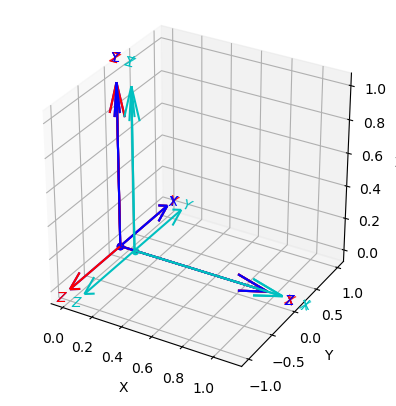

In [61]:
R = rotx(pi / 2)

trplot(R);
tranimate(R)

trplot(R, anaglyph=True)
tranimate(R, anaglyph=True);

R = rotx(pi / 2) @ roty(pi / 2)
trplot(R)

roty(pi / 2) @ rotx(pi / 2)

|Term|Expression|Explanation|
|---|---|---|
| Compostion | $ \vec{\xi}_1 \oplus \vec{\xi}_2 \rightarrow \vec{R}_1\vec{R}_2 $ | Matrix Multiplication |
| Inverse | $ \ominus \vec{\xi} \rightarrow \vec{R}^{-1} = \vec{R}^T $ | Matrix Transpose |
| Identity | $ \varnothing \rightarrow \vec{R}(0) = \vec{1}_{3x3} $ | Identity Matrix |
| Vector-Transform | $ \vec{\xi} \cdot \vec{v} \rightarrow \vec{Rv} $ | Matrix-Vector Product |

Composition is not commutative, that is, $ \vec{R}_1\vec{R}_2 \neq \vec{R}_2\vec{R}_1 $

# 2.3.1.2 - Three-Angle Representations

**Euler's rotation theorem: Any two independent orthonormal coordinate frames can be related by a sequence o frotations (not more than three) about coordinate axes, wher no two successive rotations may be about the same axis**

Euler's rotation theorem means that a rotation between any two coordinate frames in 3D can be represented by a sequence of three rotation angles each associated ith a particular coordinate frame axis. The rotations are applied consecutively:
* The first rotates the world frame {0} around some axis to create a new coordinate frame {1}
* A rotation about some axis of {1} results in frame {2}
* A rotation about some axis of {2} results in frame {3}

There are a total of 12 unique rotation sequences:
* 6 involve repetition, but not successive, of rotations aobut one particular axis: XYX, XZX, YXY, YZY, ZXZ, ZYZ
* 6 are charcterized by rotations about all 3 axes: XYZ, XZY, YZX, YXZ, ZXY, ZYX

**"Euler angles" is an ambiguous term. It is common practive to refer to all possible 3-angle representations as Euler angles, but this is insufficiently precise since there are 12 rotation sequences. The particular angle sequence needs to be specified, but it is often an implicit convention within a particular tech field.**

*Note: $ (\vec{S}^1)^3 $ or $ \vec{S}^1 x \vec{S}^1 x \vec{S}^1 $ denotes a 3-tuple of angles, where as $ \vec{S} ^3 $ is an angle in 4D space*

In mechanical dynamics, the ZYZ sequence is commonly used $ \vec{R}(\phi, \theta, \psi) = \vec{R}_z(\phi)\vec{R}_y(\theta)\vec{R}_x(\psi) $ and the Euler angles are written as the 3-vector $ \vec{\Gamma}  = (\phi, \theta, \psi) \in (\vec{S}^1)^3 $. To compute the equivalent rotation matrix for $ \vec{\Gamma} $ = (0.1, 0.2, 0.3), we write:

In [62]:
R = rotz(.1) @ roty(.2) @ rotz(.3);

# more convenient:
R = eul2r(.1, .2, .3)

# The inverse problem is finding the angles that correspond to the given matrix:
gamma = tr2eul(R)

# if theta is -
R = eul2r(.1, -.2, .3)

gamma = tr2eul(R)

# corresponding rotation matrix:
eul2r(gamma)

# case where theta = 0:
R = eul2r(.1, 0, .3)
tr2eul(R)

array([       0,        0,      0.4])

These Euler angles will generate the same rotation matrix. The explanation is that if $ \theta $ = 0 then $ \vec{R}_y = \vec{1}_{3x3} $ and becomes $ \vec{R} = \vec{R}_z(\phi)\vec{R}_z(\psi) = \vec{R}(\phi + \psi) $ which is a function of the sum. The inverse operation can determine this sum and arbitrarily split it between $ \phi $ and $ \psi $. The case $ \theta $ = 0 is a sinularity.

The other widely used convention are the Cardan angles: roll, pitch, and yaw which we denote as $ \alpha, \beta, $ and $ \gamma $ respectively.

**Roll-pitch-yaw angle ambiguity: Confusingly, there are two different roll-pitch-yaw sequences in common use: ZYX or XYZ, depending on whether the topic is mobile robots or robot manipulators respectively**

When describing the attitude of vehicles such as ships, aircraft and cars, the convention is that the x-axis of the body frame points in the forward direction and its z-axis points either up or down. We start with the world reference frame in order:
* rotate about the world z-axis by the yaw angle, $ \gamma $, so that the x-axis points in the direction of travel
* rotate about the y-axis of the fram above by the pitch angle, $ \beta $, which sets the angle of the vehicle's longitudinal axis relative to teh horizontal plane (pitching the nose up or down)
* rotate about teh x-axis of the frame above by the roll angle, $ \alpha $, so that the vehicle's body rolls about its longitudinal axis

which leads to teh ZYX angle sequence: $ \vec{R}(\alpha, \beta, \gamma) = \vec{R}_z(\gamma)\vec{R}_y(\beta)\vec{R}_x(\alpha) $

The roll, pitch, and yaw angles are written as the 3-vector $ \Gamma  = (\phi, \theta, \psi) \in (\vec{S}^1)^3 $

In [63]:
R = rpy2r(.1, .2, .3, order="zyx")

# inverse
gamma = tr2rpy(R, order="zyx")

When describing the orientation of a robot gripper, the convention is that the coordinate frame has the z-axis pointing forward and the y-axis is parallel to a line between the fingertips. This leads to the XYZ angle sequence: $ \vec{R}(\alpha, \beta, \gamma) = \vec{R}_x(\gamma)\vec{R}_y(\beta)\vec{R}_z(\alpha) $

In [64]:
R = rpy2r(.1, .2, .3, order="xyz")

# inverse
gamma = tr2rpy(R, order="xyz")

The roll-pitch-yaw sequence allows all angles to have arbitrary sign and it has a singularity when $ \beta = \pm \frac{\pi}{2} $. The Toolbox includes and interactive graphical tool that allows you to experiment with Euler angles or roll-pitch-yaw angles and visualize their effect on the orientation of an object. This can also be run from the operating system command line as `tripleangledemo`.

In [ ]:
%run -m tripleangledemo
# Note: This will not run inside the Jupyter notebook. It will run in the terminal:
    # 1. Open terminal
    # 2. Activate the rvc3 conda environment
    # 3. Type 'tripleangledemo' in the command line. This will open a page in your browser

# 2.3.1.4 - Two-Vector Representation

# 2.3.1.5 - Rotation About an Arbitrary Vector

# 2.3.2.1 - Homogeneous Transformation Matrix